In [2]:
from datetime import datetime
import numpy as np
import networkx as nx

In [3]:
edge=np.genfromtxt("network.txt", delimiter='  ',dtype=int)
action=np.genfromtxt("Ratings.timed.csv",delimiter=',',dtype=str)
action = action[1:]
for act in action:
    act[3] = np.char.replace(act[3],"/","-")
    act[3] = np.char.replace(act[3]," 0:00","")
    if act[3][6] == "-":
        act[3] = act[3][0:5]+"0"+act[3][5:]
    if len(act[3]) == 9:
        act[3] = act[3][0:8]+"0"+act[3][8:]
    act[3] = datetime.fromisoformat(act[3]).timestamp()
sortedAct = action[action[:,3].argsort()]

sortedAct = sortedAct[:,[0,1]].astype(int)


In [4]:
edgedic = {}
for edgeinfo in edge:
    edgedic[edgeinfo[0],edgeinfo[1]] = [0,0]

In [5]:
neighbor = {}
for nodecouple in edge:
    if nodecouple[0] in neighbor.keys():
        pass
    else:
        neighbor[nodecouple[0]] = []
    neighbor[nodecouple[0]].append(nodecouple[1])

In [39]:
infected = {}
for nodecouple in edge:
    if nodecouple[0] not in infected.keys():
        infected[nodecouple[0]] = 0
    if nodecouple[1] not in infected.keys():
        infected[nodecouple[1]] = 0

In [41]:
count = 0
for attemptidx in range(len(sortedAct)):
    if sortedAct[attemptidx][0] in neighbor.keys():
        for nb in neighbor[sortedAct[attemptidx][0]]:
            edgedic[sortedAct[attemptidx][0],nb][0] += 1
            if tuple([nb,sortedAct[attemptidx][1]]) in sortedAct:
                if len(np.where((sortedAct[:,0] == nb)&(sortedAct[:,1] == sortedAct[attemptidx][1]))[0]) != 0:
                    #print(np.where((sortedAct[:,0] == nb)&(sortedAct[:,1] == sortedAct[attemptidx][1]))[0])
                    if np.where((sortedAct[:,0] == nb)&(sortedAct[:,1] == sortedAct[attemptidx][1]))[0][0] > attemptidx and infected[nb] == 0:
                        edgedic[sortedAct[attemptidx][0],nb][1] += 1
                        infected[nb] = 1

In [61]:
with open("3.2output.txt","w") as output:
    for key in edgedic.keys():
        if edgedic[key][0] != 0:
            output.write(str(key[0])+","+str(key[1])+","+str(edgedic[key][1]/edgedic[key][0])+"\n")
        else:
            output.write(str(key[0])+","+str(key[1])+","+"0.0\n")
output.close()

In [97]:
pudic={}
for key in edgedic.keys():
    if key[0] not in pudic.keys():
        pudic[key[0]] = 0.0
    if edgedic[key][0] != 0:
        pudic[key[0]] += edgedic[key][1]/edgedic[key][0]
node = list(pudic.keys())
pu = list(pudic.values())

6349


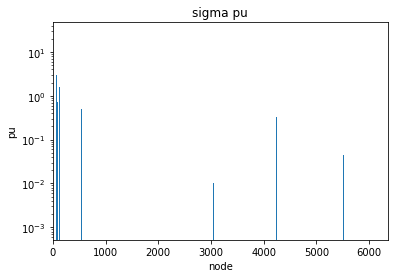

In [111]:
from matplotlib import pyplot as plt
plt.bar(node,pu,align="center")
plt.title("sigma pu")
plt.xlabel("node")
plt.ylabel("pu")
plt.xlim(0,len(node))
plt.yscale("log")
plt.show()